In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from scipy import constants as con
from scipy.optimize import curve_fit 

## **Data Analysis and NR Techniques**
### Analysing GW Data


#### Question 1

In [2]:
#taking data of strain vs time
strain_data = pd.read_table('https://raw.githubusercontent.com/SAURABH-RAI1729/KRITIGW/main/GW150914_strain_data_final.txt', sep='\t', header=None)

In [3]:
strain_data = strain_data.rename(columns = {0 : 'time', 1 : 'strain'})

strain=strain_data['strain']
times=strain_data['time']

In [4]:
#no of samples
size = len(strain_data)
size

2049

Plotting Strain vs Time curve

-0.006103515625

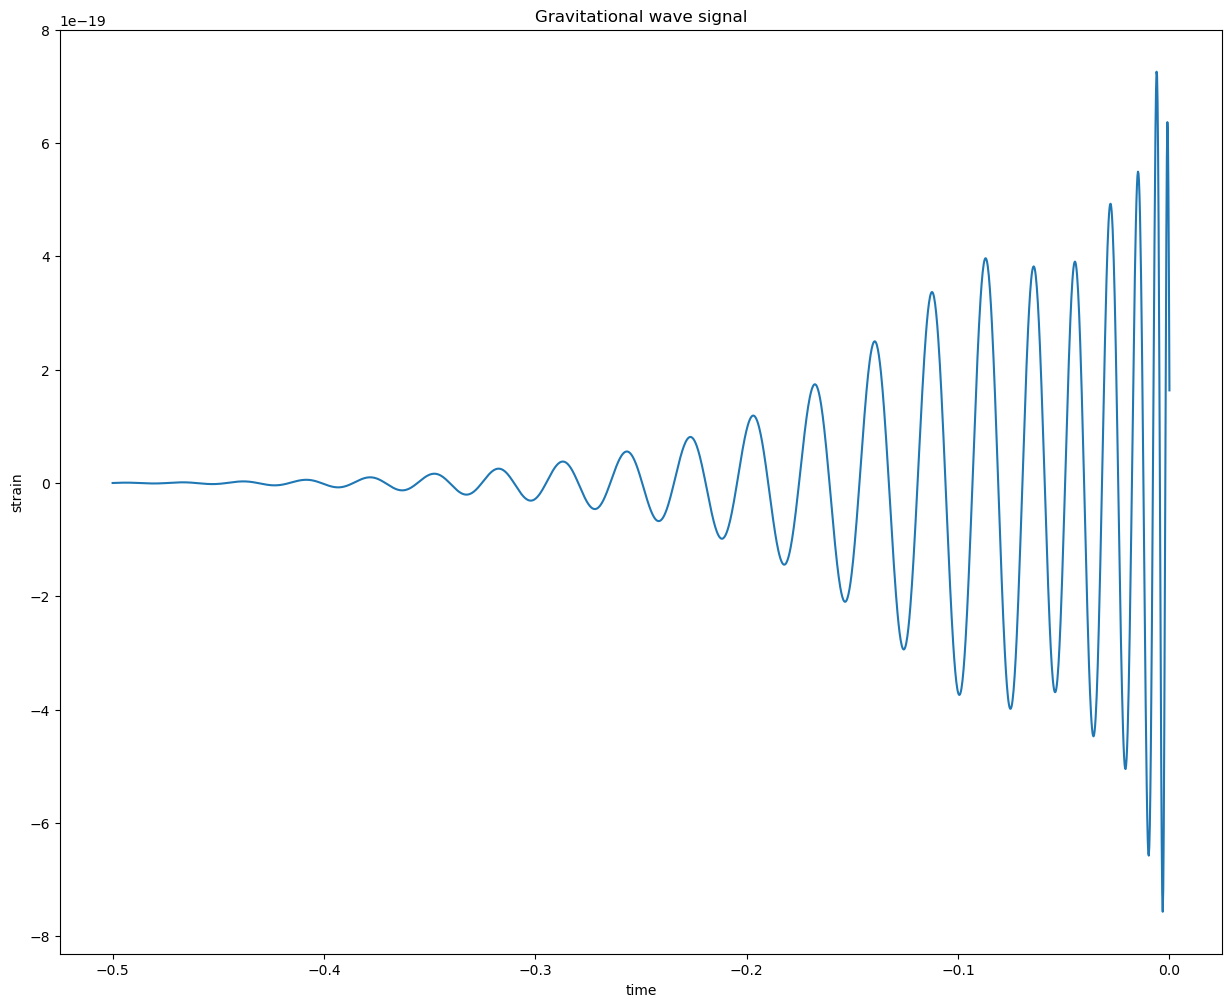

In [31]:

plt.figure(figsize=(15,12))


plt.plot(strain_data['time'], strain_data['strain'])
plt.title('Gravitational wave signal')
plt.ylabel('strain')
plt.xlabel('time')



max_strain_idx =  strain_data['strain'].idxmax()

max_strain_time = strain_data['time'][max_strain_idx]

max_strain_time


Plotting the beginning part of the plot

Text(0.5, 0, 'time')

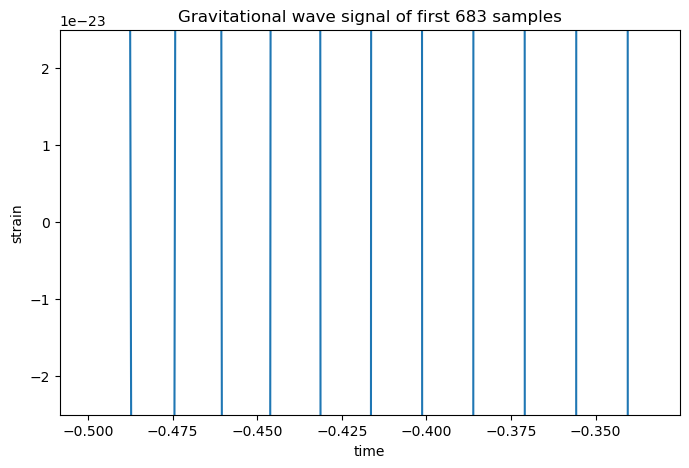

In [45]:

plt.figure(figsize=(8,5))
plt.plot(times[0:683],strain[0:683])
plt.ylim([-2.5e-23,2.5e-23])
plt.title('Gravitational wave signal of first 683 samples')
plt.ylabel('strain')
plt.xlabel('time')

Plotting the middle part

Text(0.5, 0, 'time')

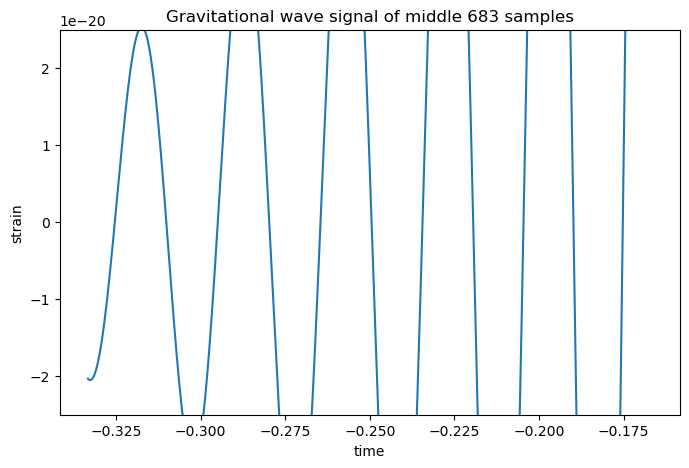

In [43]:

plt.figure(figsize=(8,5))
plt.plot(times[683:1366],strain[683:1366])
plt.ylim([-2.5e-20,2.5e-20])
plt.title('Gravitational wave signal of middle 683 samples')
plt.ylabel('strain')
plt.xlabel('time')

Plotting the end part

Text(0.5, 0, 'time')

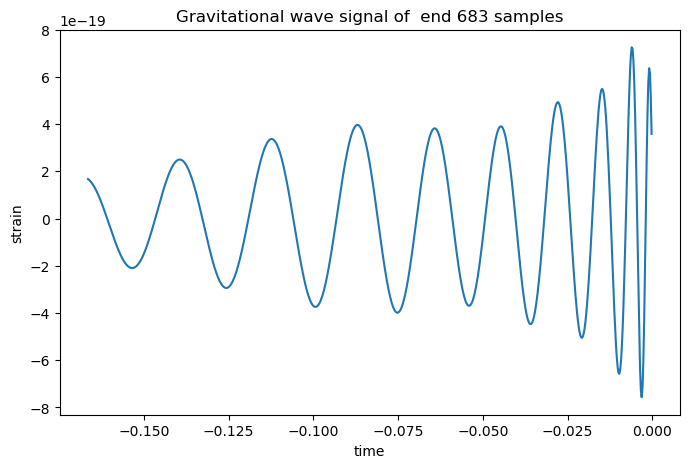

In [44]:
plt.figure(figsize=(8,5))
plt.plot(times[1366:2048],strain[1366:2048])
plt.title('Gravitational wave signal of  end 683 samples')
plt.ylabel('strain')
plt.xlabel('time')

#### Question 2

In first subplot we can see that the amplitude of the strain is very less because the gravitational waves are very weak when 
the two heavy bodies  are far apart it is the  inspiral phase which is the first stage of a binary blackhole
system. It's a gradual shrinking orbit, and the first stages can take a long time.

In second subplot we can see that the amplitude of strain has started to increase suggesting that the two bodies are getting 
closer to each other producing strong gravitational waves

In third subplot we can see that the value of strain is increasing exponentially and is maximum at the end from this observation
we can say that the two heavenly bodies are merging.

* The strain from gravitational waves has a temporal dependence because gravitational waves themselves are ripples in the fabric 
  of spacetime that propagate outward from their source at the speed of light.
* These waves carry energy and information about the motion of massive objects, such as merging black holes or neutron stars, that produced them. 
* The temporal dependence of strain in gravitational waves reflects the changes in spacetime geometry as these waves pass through an observer's location.

#To understand why strain has a temporal dependence, consider the following points:

 1.Origin of Gravitational Waves: Gravitational waves are generated by variations in the quadrupole moment of a mass
distribution, which occurs when masses in the system are accelerating in a non-spherically symmetric manner. 
This acceleration leads to changes in the gravitational field, which propagate as waves.

 2.Propagation of Waves: As gravitational waves propagate, they stretch and squeeze the spacetime through which they pass.
This effect can be measured as changes in distances between points in space, which is referred to as strain. The strain h
represents the fractional change in distance between two points due to the passage of a gravitational wave.

 3.Temporal Dependence of Strain: The strain varies with time because the gravitational waves themselves change
as they move away from their source. The strain at any given moment depends on the state of the wave at that time, reflecting
the ongoing dynamics of the source that generated the waves. For example, in the case of two merging black holes, the frequency
and amplitude of the gravitational waves (and hence the strain) increase as the black holes spiral closer together and
eventually merge.

 4.Mathematical Description: The temporal dependence of strain can be mathematically described using wave equations derived
from Einstein's general theory of relativity. The solutions to these equations for gravitational waves often take the form of 
sinusoidal functions that vary with time, representing the oscillatory stretching and squeezing of spacetime.

 The temporal dependence of strain is crucial for gravitational wave detection and analysis. By observing the time-varying 
strain, detectors like LIGO and Virgo can infer properties of the gravitational wave sources, including their masses, distances,
and the dynamics of their motion. This ability to measure and analyze the temporal dependence of strain has opened a new window
onto the universe, allowing for the observation of phenomena that are not accessible through electromagnetic radiation.

#### Question 3

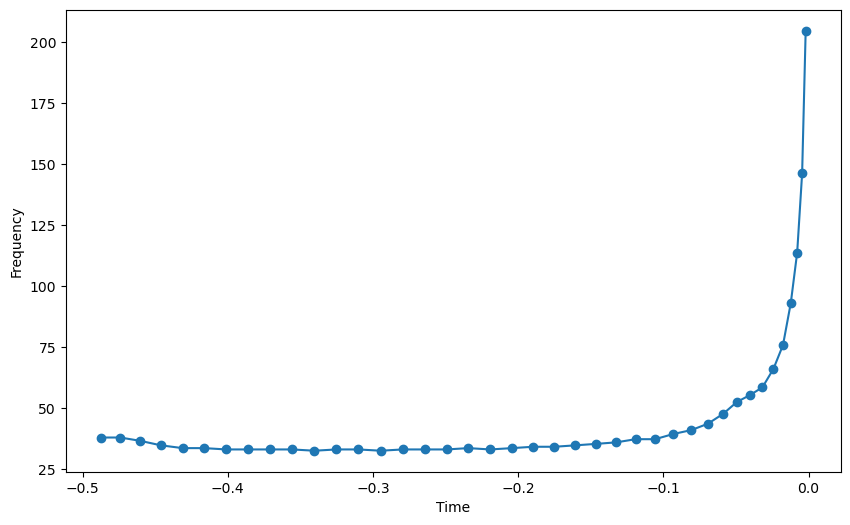

In [6]:
#frequency variation with time it increases as they approach each other
time = []

count = 0
for i in range(1, size):
    if(strain_data['strain'][i]*strain_data['strain'][i-1] < 0):
        time.append(strain_data['time'][i] )
        
freq = [0] * len(time)
freq[0] = 0
for i in range(1,len(time)):
    val = 0.5/(time[i] - time[i - 1])
    freq[i] = val

freq[0] = freq[1]
freq[0]

plt.figure(figsize = (10,6))
plt.xlabel("Time")
plt.ylabel("Frequency")
plt.plot(time,freq, marker = 'o', linestyle ='-')

In [7]:
#frequencies of each cycle
freq

[37.925925925925924,
 37.925925925925924,
 36.57142857142857,
 34.71186440677966,
 33.57377049180328,
 33.57377049180328,
 33.03225806451613,
 33.03225806451613,
 33.03225806451613,
 33.03225806451613,
 32.507936507936506,
 33.03225806451613,
 33.03225806451613,
 32.507936507936506,
 33.03225806451613,
 33.03225806451613,
 33.03225806451613,
 33.57377049180328,
 33.03225806451613,
 33.57377049180328,
 34.13333333333333,
 34.13333333333333,
 34.71186440677966,
 35.310344827586206,
 35.92982456140351,
 37.236363636363635,
 37.236363636363635,
 39.38461538461539,
 40.96,
 43.57446808510638,
 47.627906976744185,
 52.51282051282051,
 55.351351351351354,
 58.51428571428571,
 66.06451612903226,
 75.85185185185185,
 93.0909090909091,
 113.77777777777777,
 146.28571428571428,
 204.8]

#### Question 4

In [8]:
#expression useful for chirp mass calculation 
f = []
for i in range(len(freq)):
    val = freq[i]**(-8/3)
    f.append(val)
 

Using the linear relation we obtained from integrating the equation we got from question 5 in theory part we just need to equate
the relation of slope we obtained to the experimental value of slope
slope=(-GMc^(5/3)/c^5)*((8pi)**(8/3)/5)

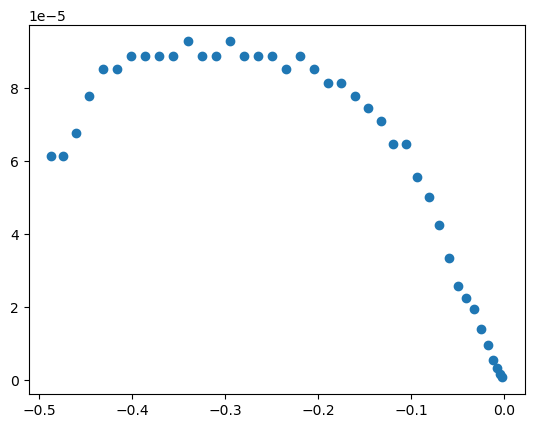

In [9]:
plt.scatter(time,f)


In [10]:
time

[-0.4873046875,
 -0.47412109375,
 -0.46044921875,
 -0.446044921875,
 -0.43115234375,
 -0.416259765625,
 -0.401123046875,
 -0.385986328125,
 -0.370849609375,
 -0.355712890625,
 -0.34033203125,
 -0.3251953125,
 -0.31005859375,
 -0.294677734375,
 -0.279541015625,
 -0.264404296875,
 -0.249267578125,
 -0.234375,
 -0.21923828125,
 -0.204345703125,
 -0.189697265625,
 -0.175048828125,
 -0.16064453125,
 -0.146484375,
 -0.132568359375,
 -0.119140625,
 -0.105712890625,
 -0.093017578125,
 -0.080810546875,
 -0.0693359375,
 -0.058837890625,
 -0.04931640625,
 -0.040283203125,
 -0.03173828125,
 -0.024169921875,
 -0.017578125,
 -0.01220703125,
 -0.0078125,
 -0.00439453125,
 -0.001953125]

y = -0.00062 * x + -0.00000


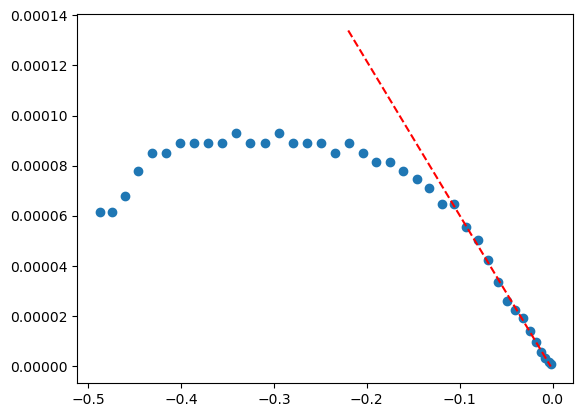

In [11]:
#doing curve fitting from time(-.105712890625) close to merger time to get more accurate value
def objective(x, a, b):
	return a * x + b
index = 27
popt, _ = curve_fit(objective, time[index:], f[index :])
a, b = popt
print('y = %.5f * x + %.5f' % (a, b))
plt.scatter(time, f)
x_line = np.arange(-0.22, max(time),0.0005)
y_line = objective(x_line, a, b)
plt.plot(x_line, y_line, '--', color='red')
plt.show()


In [12]:
#constants
pi = math.pi
c =  con.speed_of_light
G = con.gravitational_constant
r = 0.00062
Solarmass=1.989e30

In [13]:
#calculation
Mchirp=(((5*r)/((8*pi)**(8/3)))**(3/5))*((c**3)/G)
Mchirp

7.252531536305782e+31

In [14]:
# Chirp Mass in solarmass
Mchirp=Mchirp/Solarmass
Mchirp

36.46320531073797

In [15]:
##time , freq, f8/3
err = 10e-3
val=[]
min_idx = []
for i in range(len(times)):
    if(abs(times[i] - max_strain_time) < err):
        val.append(times[i])

min_time = val[0]  

for i in range(len(val)):
    if (val[i] < min_time):
        min_time = val[i]
        min_idx = i
#merger time
min_time


-0.015869140625

#### Question 5

The coalescence is observed when the frequency of the gravitational waves rapidly increases, reaching its maximum at the merger
point. This is part of the so-called "chirp" signal, where both the frequency and amplitude of the gravitational waves increase 
sharply as the two objects spiral closer and merge. The exact moment of coalescence can be identified in the data as the point
where the strain signal reaches its maximum amplitude.

In [16]:
max_strain_idx =  strain_data['strain'].idxmax()

max_strain_time = strain_data['time'][max_strain_idx]
#merger time correspoding to the time of maximum strain
max_strain_time

-0.006103515625

Assuming that both bodies have same mass then u(reduced mass) will be m*m/(m+m)=m/2
and total mass will be M=2m
chirp mass=((u**3)*(M**2))**(1/5)
          =1/2.3(M)

In [17]:
#total mass of the system in solar masses
Mtotal=2.3*Mchirp
u=Mtotal/4
Mtotal


83.86537221469732

In [18]:
freq

[37.925925925925924,
 37.925925925925924,
 36.57142857142857,
 34.71186440677966,
 33.57377049180328,
 33.57377049180328,
 33.03225806451613,
 33.03225806451613,
 33.03225806451613,
 33.03225806451613,
 32.507936507936506,
 33.03225806451613,
 33.03225806451613,
 32.507936507936506,
 33.03225806451613,
 33.03225806451613,
 33.03225806451613,
 33.57377049180328,
 33.03225806451613,
 33.57377049180328,
 34.13333333333333,
 34.13333333333333,
 34.71186440677966,
 35.310344827586206,
 35.92982456140351,
 37.236363636363635,
 37.236363636363635,
 39.38461538461539,
 40.96,
 43.57446808510638,
 47.627906976744185,
 52.51282051282051,
 55.351351351351354,
 58.51428571428571,
 66.06451612903226,
 75.85185185185185,
 93.0909090909091,
 113.77777777777777,
 146.28571428571428,
 204.8]

In [19]:
initialfrequency=37.925
initialorbitalfreq=initialfrequency/2
Fi=initialorbitalfreq
Fi

18.9625

calculating initial distance from initial frequency

In [20]:
d_initial=((G*Mtotal*Solarmass)/(2*pi*Fi)**2)**(1/3)/1000
d_initial

922.1978111906985

In [21]:
d = []
for i in range(len(times)):
    t1=(times[i]/(0.001953))
    t2=(1-t1)**(0.25)
    val=d_initial*t2
    
    d.append(val)

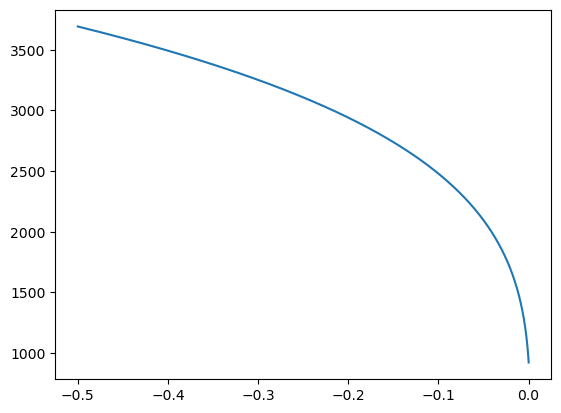

In [22]:
#orbital separation as a fxn of time
plt.plot(times,d)

#### Question 6

In [23]:
#from figure1 we can see that the frequency of the GW is close to 100hz when the strain if the GW is maximun so we take the 
#frequency which is closer 100hz range which is obtained in the freq array (last 3rd)
freqmerger=113.777
freqmerger

113.777

In [24]:
#orbital frequency=frequency of GW/2
Forb=freqmerger/2
Forb

56.8885

In [25]:
m1=Mtotal/2
m1

41.93268610734866

In [26]:
#distance between the two celestial bodies in kilometer
d=((G*2*m1*Solarmass)/((2*pi*Forb)**2))**(1/3)
#in kilometers
d=d/1000 
d

443.3412701256073

In [27]:
#Schwarzschild radius in Km to check  if it is a blackhole
Rs=(2*G*m1*Solarmass)/(c**2)
Rs=Rs/1000
Rs

123.87446155452152

In [28]:
#compactness ratio R
R=d/(2*Rs)
#in
R

1.7894780916180903

For comparison with other known Keplerian systems,the orbit of Mercury, the innermost planet in our solarsystem,
has R ∼ 2 × 107, the binary orbit for the stellar black hole in Cyg X-16 has R ∼ 3 × 105, and the binary
system of highest known orbital frequency, the WD system HM Cancri (RX J0806), has R ∼ 2 × 104 [24]. Observations of orbits
around our galactic center indicate the presence of a supermassive black hole, named Sgr A* [25,26], with the star S2 orbiting 
it as close as R ∼ 103. For a system of two neutron stars just touching, R would be between ∼2 and ∼5.
The fact that the Newtonian/Keplerian evolution of the orbit inferred from the signal of GW150914 breaksdown when the 
separation is about the order of the blackhole radii (compactness ratio R of order 1) is further evidence that the objects 
are highly compact.
R is coming less than 2 so it is a blackhole